In [1]:
epoch = 20
batch_size = 512
lr = 1e-3

In [2]:
import tensorflow as tf
import numpy as np
# num_words=10000 only keep the top 10,000 most frequently occurring words in the training data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
y_train = y_train.astype(np.float32).reshape((-1,1))
y_test = y_test.astype(np.float32).reshape((-1,1))
word2int = tf.keras.datasets.imdb.get_word_index(path='imdb_word_index.json')
int2word = dict([(value, key) for (key, value) in word2int.items()])
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000,) (25000, 1) (25000,) (25000, 1)


In [3]:
# We decode the review; note that our indices were offset by 3 because
# 0 - "padding"
# 1 - "start of sequence"
# 2 - "unknown".
print(x_train[0])
print(' '.join([int2word.get(i - 3, '?') for i in x_train[0]]))
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
? this film was just brilliant casting location scenery stor

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  
    return results
x_train = vectorize_sequences(x_train) 
x_test = vectorize_sequences(x_test) 

In [5]:
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

if 1:
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
elif 1:
    from keras import optimizers
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
else:
    from keras import optimizers
    from keras import losses
    from keras import metrics
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                  loss=losses.binary_crossentropy,
                  metrics=[metrics.binary_accuracy])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.5241 - accuracy: 0.7871 - val_loss: 0.3994 - val_accuracy: 0.8686
Epoch 2/20
15000/15000 [==============================] - 1s 65us/step - loss: 0.3221 - accuracy: 0.8988 - val_loss: 0.3276 - val_accuracy: 0.8728
Epoch 3/20
15000/15000 [==============================] - 1s 64us/step - loss: 0.2331 - accuracy: 0.9235 - val_loss: 0.2810 - val_accuracy: 0.8889
Epoch 4/20
15000/15000 [==============================] - 1s 65us/step - loss: 0.1810 - accuracy: 0.9409 - val_loss: 0.2829 - val_accuracy: 0.8859
Epoch 5/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1471 - accuracy: 0.9532 - val_loss: 0.2864 - val_accuracy: 0.8848
Epoch 6/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1220 - accuracy: 0.9625 - val_loss: 0.3097 - val_accuracy: 0.8799
Epoch 7/20
15000/15000 [==============================] - 1s 65us/

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

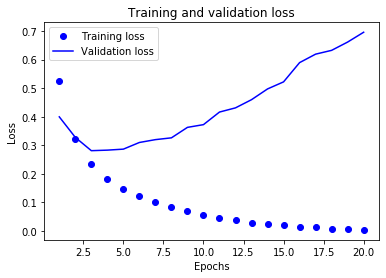

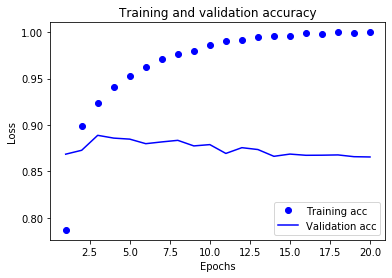

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
results = model.evaluate(x_test, y_test)
print(results) # [loss, accuracy]

25000/25000 [==============================] - 2s 65us/step
[0.7526875349283219, 0.850600004196167]


In [9]:
model.predict(x_test)

array([[0.00796863],
       [1.        ],
       [0.99783885],
       ...,
       [0.00278011],
       [0.01460186],
       [0.8519776 ]], dtype=float32)